In [50]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn


In [51]:
print(torch.__version__)
print(torch.cuda.is_available())
device = torch.device("cuda")

2.4.0
True


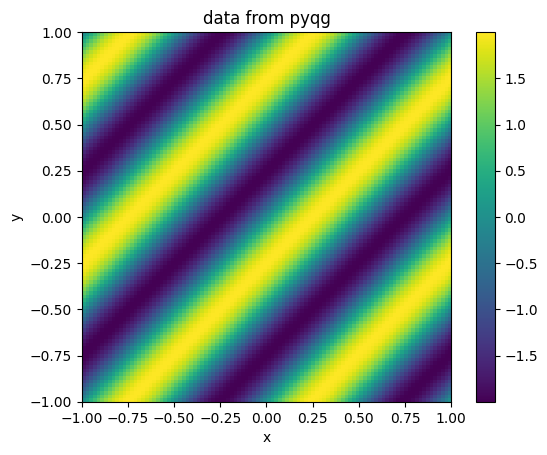

In [3]:
#это синтетические данные, они не нужны
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)

def f(x, y):
    return 2 * np.sin(2 * np.pi * (x + y)) #+ noise
data = f(X, Y).reshape(100,100)
# Визуализация данных
plt.title('data from pyqg')
plt.xlabel('x')
plt.ylabel('y')
plt.imshow(data, extent=[np.min(x), np.max(x), np.min(y), np.max(y)])
plt.colorbar()
plt.show()

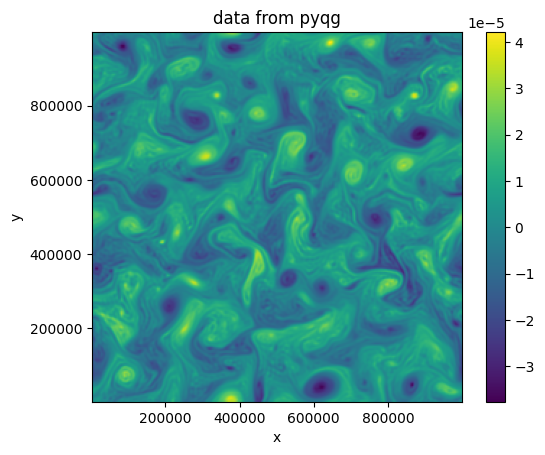

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
x = np.load('x_eddy_noforce_q.npy')
y = np.load('y_eddy_noforce_q.npy')
data = np.load('data_eddy_noforce_q.npy')
# Визуализация данных
plt.title('data from pyqg')
plt.xlabel('x')
plt.ylabel('y')
plt.imshow(data, extent=[np.min(x), np.max(x), np.min(y), np.max(y)])
plt.colorbar()
plt.show()


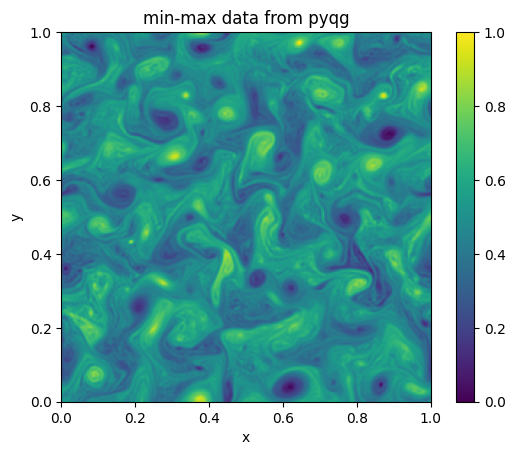

In [5]:
# Масштабирование сетки от 0 до 1
x = (x - np.min(x)) / (np.max(x) - np.min(x))
#print(x)

y = (y - np.min(y)) / (np.max(y) - np.min(y))
#print(y)

#масштабирование данных до 0 до 1
data = (data - np.min(data)) / (np.max(data) - np.min(data))
#print(data)

#print(x.shape)
#print(y.shape)

# Визуализация данных
plt.title('min-max data from pyqg')
plt.xlabel('x')
plt.ylabel('y')
plt.imshow(data, extent=[np.min(x), np.max(x), np.min(y), np.max(y)])
plt.colorbar()
plt.show()

[[ 0.02316669  0.05617945  0.07253653 ... -0.04367334 -0.01949023
  -0.00245881]
 [ 0.00160037  0.06605578  0.05237163 ... -0.02289167 -0.03786763
  -0.05091265]
 [-0.05974562 -0.01624123 -0.03752724 ... -0.03858335 -0.05618323
  -0.08677936]
 ...
 [-0.07302445  0.00718571  0.02844714 ... -0.2162717  -0.22599467
  -0.17668324]
 [ 0.01550637  0.03811107  0.03953282 ... -0.25174651 -0.15629443
  -0.05445814]
 [ 0.03774755  0.02698236  0.03861136 ... -0.14837184 -0.04608813
   0.02629253]]


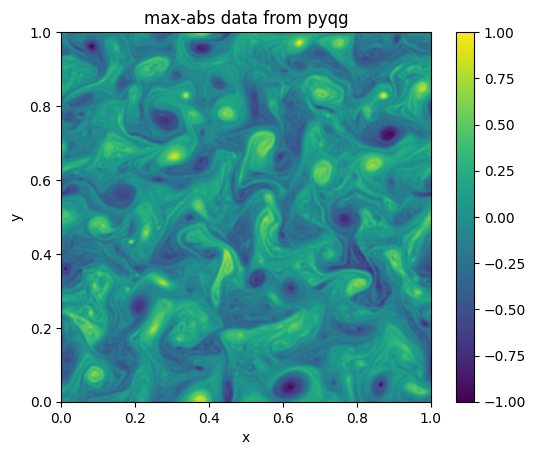

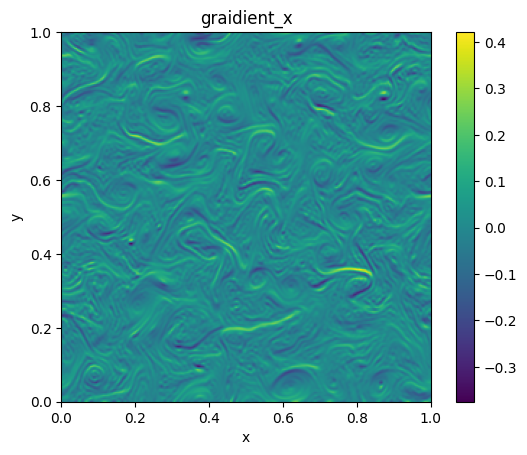

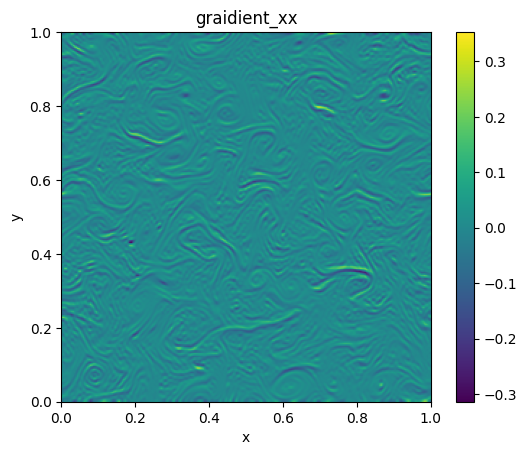

In [6]:
#масштабирование данных до -1 до 1
data = 2 * (data - np.min(data)) / (np.max(data) - np.min(data)) - 1
print(data)

gradient_x = np.gradient(data,axis = 0, edge_order=2)
gradient_y = np.gradient(data,axis = 1, edge_order=2)

gradient_xx = np.gradient(gradient_x,axis = 0, edge_order=2)
gradient_yy = np.gradient(gradient_y,axis = 1, edge_order=2)

# Визуализация данных
plt.title('max-abs data from pyqg')
plt.xlabel('x')
plt.ylabel('y')
plt.imshow(data, extent=[np.min(x), np.max(x), np.min(y), np.max(y)])
plt.colorbar()
plt.show()

plt.title('graidient_x')
plt.xlabel('x')
plt.ylabel('y')
plt.imshow(gradient_x, extent=[np.min(x), np.max(x), np.min(y), np.max(y)])
plt.colorbar()
plt.show()

plt.title('graidient_xx')
plt.xlabel('x')
plt.ylabel('y')
plt.imshow(gradient_xx, extent=[np.min(x), np.max(x), np.min(y), np.max(y)])
plt.colorbar()
plt.show()

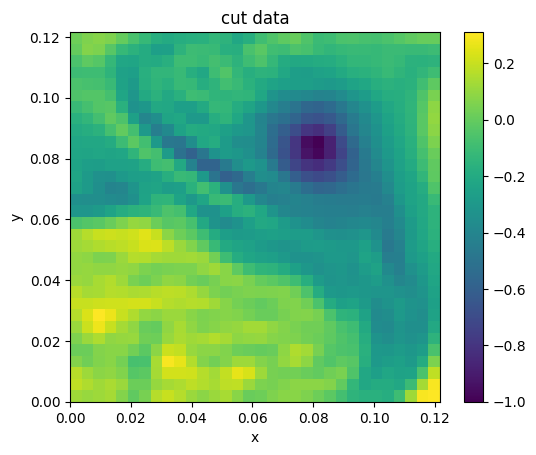

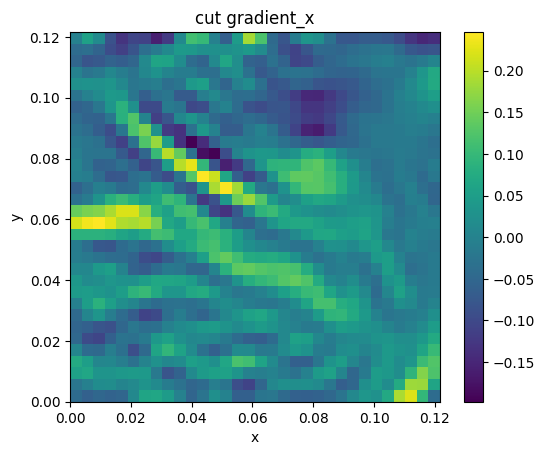

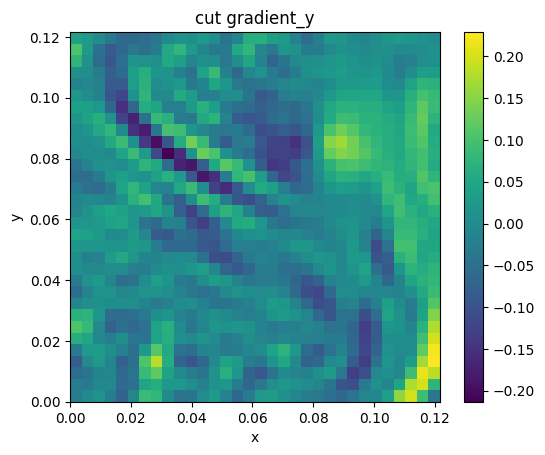

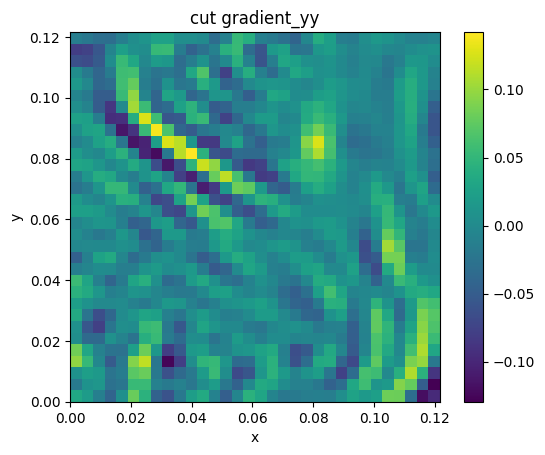

In [7]:
x = x[0:32]
y = y[0:32]
data = data[0:32,0:32]
gradient_x = gradient_x[0:32,0:32]
gradient_y = gradient_y[0:32,0:32]
gradient_xx = gradient_xx[0:32,0:32]
gradient_yy = gradient_yy[0:32,0:32]

plt.title('cut data')
plt.xlabel('x')
plt.ylabel('y')
plt.imshow(data, extent=[np.min(x), np.max(x), np.min(y), np.max(y)])
plt.colorbar()
plt.show()

plt.title('cut gradient_x')
plt.xlabel('x')
plt.ylabel('y')
plt.imshow(gradient_x, extent=[np.min(x), np.max(x), np.min(y), np.max(y)])
plt.colorbar()
plt.show()

plt.title('cut gradient_y')
plt.xlabel('x')
plt.ylabel('y')
plt.imshow(gradient_y, extent=[np.min(x), np.max(x), np.min(y), np.max(y)])
plt.colorbar()
plt.show()

plt.title('cut gradient_yy')
plt.xlabel('x')
plt.ylabel('y')
plt.imshow(gradient_yy, extent=[np.min(x), np.max(x), np.min(y), np.max(y)])
plt.colorbar()
plt.show()

In [8]:
print(data.shape)
print(y.shape)

(32, 32)
(32,)


In [9]:
data = torch.from_numpy(data)
x = torch.from_numpy(x)
y = torch.from_numpy(y)
gradient_x = torch.from_numpy(gradient_x)
gradient_y = torch.from_numpy(gradient_y)
gradient_xx = torch.from_numpy(gradient_xx)
gradient_yy = torch.from_numpy(gradient_yy)

In [10]:
#device = torch.device("cpu")
#device = torch.device("cuda")

x = x.float().to(device)
y = y.float().to(device)
data = data.float().to(device)
gradient_x = gradient_x.to(dtype=torch.float32).to(device)
gradient_y = gradient_y.to(dtype=torch.float32).to(device)
gradient_xx = gradient_xx.to(dtype=torch.float32).to(device)
gradient_yy = gradient_yy.to(dtype=torch.float32).to(device)


In [11]:
print(data.shape)
print(y.shape)
print(x.shape)
print(gradient_x.shape)
print(gradient_xx.shape)


torch.Size([32, 32])
torch.Size([32])
torch.Size([32])
torch.Size([32, 32])
torch.Size([32, 32])


In [12]:
#обучение на данных
model = torch.nn.Sequential(
    torch.nn.Linear(2, 1024),
    torch.nn.ReLU(),
    torch.nn.Linear(1024, 512),
    torch.nn.ReLU(),
    torch.nn.Linear(512, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 128),
    torch.nn.ReLU(),
    torch.nn.Linear(128, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 32),
    torch.nn.ReLU(),
    torch.nn.Linear(32, 16),
    torch.nn.ReLU(),
    torch.nn.Linear(16, 8),
    torch.nn.ReLU(),
    torch.nn.Linear(8, 1)
).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=10e-4)

grid_points = torch.stack(torch.meshgrid(x, y, indexing='ij'), dim=-1).reshape(-1, 2).to(device)

losses = []

for epoch in range(10000):
    optimizer.zero_grad()
    output = model(grid_points).reshape(32, 32).to(device)
    loss = criterion(output, gradient_x)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    print(f'Epoch {epoch}, Loss: {loss.item()}')

print(output.shape)



Epoch 0, Loss: 0.07420577108860016
Epoch 1, Loss: 0.0674484372138977
Epoch 2, Loss: 0.06000673398375511
Epoch 3, Loss: 0.05205988138914108
Epoch 4, Loss: 0.04239284247159958
Epoch 5, Loss: 0.03206860274076462
Epoch 6, Loss: 0.020993128418922424
Epoch 7, Loss: 0.01234174519777298
Epoch 8, Loss: 0.005786203313618898
Epoch 9, Loss: 0.005310014355927706
Epoch 10, Loss: 0.0118397306650877
Epoch 11, Loss: 0.01554959174245596
Epoch 12, Loss: 0.012626356445252895
Epoch 13, Loss: 0.008055897429585457
Epoch 14, Loss: 0.005202789790928364
Epoch 15, Loss: 0.004601435735821724
Epoch 16, Loss: 0.0053710551001131535
Epoch 17, Loss: 0.006414481438696384
Epoch 18, Loss: 0.007196628488600254
Epoch 19, Loss: 0.007529579568654299
Epoch 20, Loss: 0.0074149612337350845
Epoch 21, Loss: 0.0071287937462329865
Epoch 22, Loss: 0.006571345962584019
Epoch 23, Loss: 0.005885431542992592
Epoch 24, Loss: 0.0052206069231033325
Epoch 25, Loss: 0.0047345468774437904
Epoch 26, Loss: 0.0045706587843596935
Epoch 27, Loss: 

KeyboardInterrupt: 

0.00029773777


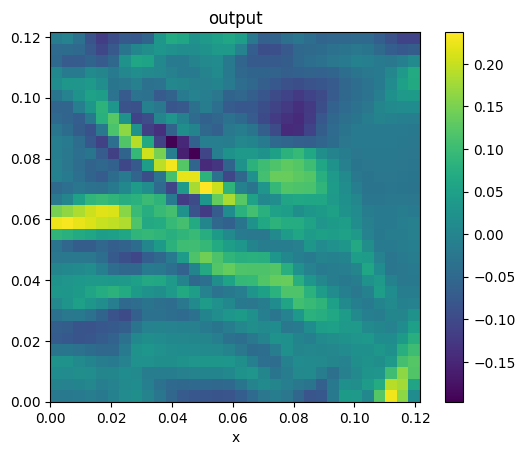

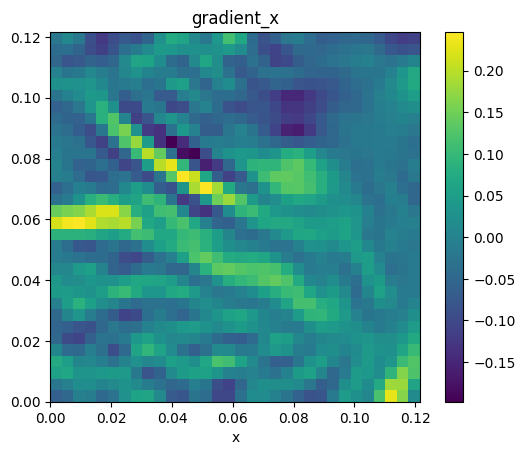

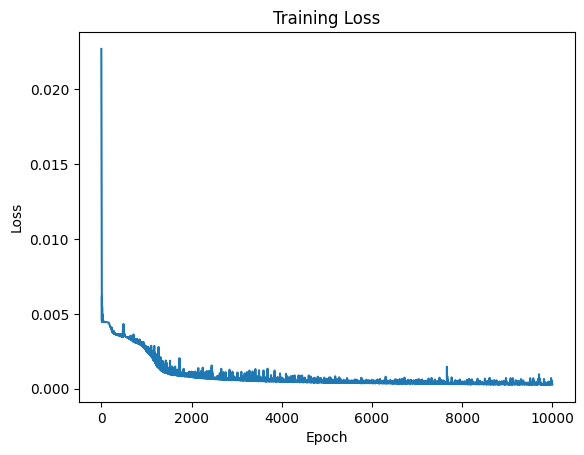

In [210]:
output = output.detach().cpu().numpy() 
x = x.cpu().numpy() 
y = y.cpu().numpy() 
gradient_x = gradient_x.detach().cpu().numpy() 

print((np.square(output - gradient_x)).mean(axis=None))

plt.imshow(output, extent=[np.min(x), np.max(x), np.min(y), np.max(y)])
plt.title('output')
plt.xlabel('x')
plt.colorbar()
plt.show()

plt.imshow(gradient_x, extent=[np.min(x), np.max(x), np.min(y), np.max(y)])
plt.title('gradient_x')
plt.xlabel('x')
plt.colorbar()
plt.show()

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

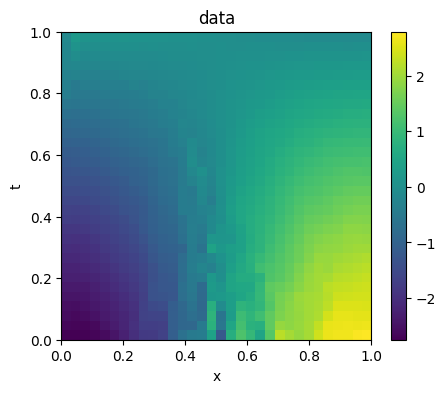

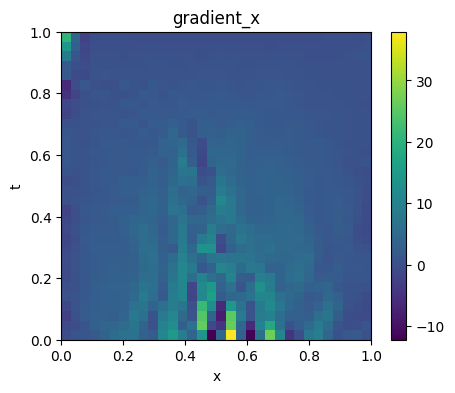

In [57]:
L = 1    
T = 1          
Nx = 32          
Nt = 32          
c = 0.25    
x = np.linspace(0, L, Nx)
t = np.linspace(0, T, Nt) 
dx = L / (Nx - 1)
dt = T / (Nt - 1)
data = np.load('wave_Inverse_x_noise0.01.npy')
gradient_x = np.gradient(data, dx, axis = 1, edge_order=2)
gradient_t = np.gradient(data, dt, axis = 0, edge_order=2)
gradient_xx = np.gradient(gradient_x, dx, axis = 1, edge_order=2)
gradient_tt = np.gradient(gradient_t, dt, axis = 0, edge_order=2)

plt.figure(figsize=(5, 4))
plt.imshow(data, aspect='auto',extent=[np.min(x), np.max(x), np.min(t), np.max(t)], cmap='viridis')
plt.title('data')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(gradient_x, aspect='auto',extent=[np.min(x), np.max(x), np.min(t), np.max(t)], cmap='viridis')
plt.title('gradient_x')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()
plt.show()

data = torch.from_numpy(data)
x = torch.from_numpy(x)
t = torch.from_numpy(t)
gradient_x = torch.from_numpy(gradient_x)
gradient_xx = torch.from_numpy(gradient_xx)
gradient_t = torch.from_numpy(gradient_t)
gradient_tt = torch.from_numpy(gradient_tt)


x = x.float().to(device)
t = t.float().to(device)
data = data.float().to(device)
gradient_x = gradient_x.float().to(device)
gradient_xx = gradient_xx.float().to(device)
gradient_t = gradient_t.float().to(device)
gradient_tt = gradient_tt.float().to(device)

In [60]:
#обучение на одном интеграле с early stopping на loss и на градиенты и с динамическим lr (лучше получается по x, те output2)
import torch.optim as optim
model = torch.nn.Sequential(
    torch.nn.Linear(2, 1024),
    torch.nn.ReLU(),
    torch.nn.Linear(1024, 512),
    torch.nn.ReLU(),
    torch.nn.Linear(512, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 128),
    torch.nn.ReLU(),
    torch.nn.Linear(128, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 32),
    torch.nn.ReLU(),
    torch.nn.Linear(32, 16),
    torch.nn.ReLU(),
    torch.nn.Linear(16, 8),
    torch.nn.ReLU(),
    torch.nn.Linear(8, 2)
).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=2000, factor=0.7)#для динамического дк

grid_points = torch.stack(torch.meshgrid(t, x, indexing='ij'), dim=-1).reshape(-1, 2).to(device)

def integrate_gradients(dx, dy, initial_value):
    integral_x = torch.zeros_like(dx)
    integral_x[0] = initial_value  
    for i in range(1, dx.shape[0]):
        integral_x[i] = integral_x[i - 1] + ((dx[i] + dx[i - 1])) / 2  
    
    integral_y = torch.zeros_like(dy)
    integral_y[:, 0] = integral_x[:, 0] 
    
    for j in range(1, dy.shape[1]):
        integral_y[:, j] = integral_y[:, j - 1] + ((dy[:, j] + dy[:, j - 1])) / 2  

    return integral_y

losses = []
initial_value = data[0, 0]
best_loss = float('inf')#хранит наименьшее значение потерь, достигнутое моделью, изначально оно установлено в бесконечность
patience_counter = 0#отслеживает количество эпох с ухудшением потерь
patience_limit = 10000  #задает максимальное количество эпох без улучшения, после которого обучение будет остановлено
target_accuracy = 0.0005  # желаемая точность

for epoch in range(200000):
    optimizer.zero_grad()
    output = model(grid_points).reshape(32, 32, 2).to(device)
    output1 = output[:,:,0]
    output2 = output[:,:,1]
    integral = integrate_gradients(output1, output2, initial_value).to(device)
    loss = criterion(integral, data)                                                   
    loss.backward()                                                                   
    optimizer.step()                                                                  
    # Динамическое изменение learning rate
    scheduler.step(loss)#позволяет планировщику изменять lr на основе текущих потерь, если потери не улучшаются в течение заданного количества эпох (patience), lr уменьшается на указанный фактор
    losses.append(loss.item())                                                        
    print(f'Epoch {epoch}, Loss: {loss.item()}')
    '''
    # Проверка на достижение целевой точности
    accuracy_x = torch.mean(torch.square(gradient_x - output1))
    accuracy_y = torch.mean(torch.square(gradient_y - output2))
    accuracy = (torch.mean(torch.square(gradient_x - output1)) + torch.mean(torch.square(gradient_y - output2))) / 2
    print('mse_gradients_x = ', accuracy_x)
    print('mse_gradients_y = ', accuracy_y)
    print('mse_gradients = ', accuracy)
    
    if accuracy_y < target_accuracy:
        print(f'Целевая точность достигнута на эпохе {epoch}. Остановка обучения.')
        break
    '''
    # Ранняя остановка
    if loss.item() < best_loss:#Если текущие потери меньше, чем best_loss, то обновляем best_loss и сбрасываем patience_counter
        best_loss = loss.item()
        patience_counter = 0
    else:
        patience_counter += 1#Если текущие потери не улучшаются, увеличиваем patience_counter
        
        if patience_counter >= patience_limit:#Если patience_counter достигает patience_limit, выводим сообщение о срабатывании ранней остановки и прерываем цикл обучения
            print("Early stopping triggered.")
            break

print(output1.shape)
print(output2.shape)



Epoch 0, Loss: 2.2323789596557617
Epoch 1, Loss: 2.034223794937134
Epoch 2, Loss: 1.851111650466919
Epoch 3, Loss: 1.684161901473999
Epoch 4, Loss: 1.5131754875183105
Epoch 5, Loss: 1.2737932205200195
Epoch 6, Loss: 1.0556524991989136
Epoch 7, Loss: 0.9383130669593811
Epoch 8, Loss: 0.8680589199066162
Epoch 9, Loss: 0.7937568426132202
Epoch 10, Loss: 0.7785844802856445
Epoch 11, Loss: 0.7066770792007446
Epoch 12, Loss: 0.7474620342254639
Epoch 13, Loss: 0.7904015779495239
Epoch 14, Loss: 0.7715791463851929
Epoch 15, Loss: 0.7348383069038391
Epoch 16, Loss: 0.6975762844085693
Epoch 17, Loss: 0.6737323999404907
Epoch 18, Loss: 0.6752937436103821
Epoch 19, Loss: 0.6476777195930481
Epoch 20, Loss: 0.6595566868782043
Epoch 21, Loss: 0.6423828601837158
Epoch 22, Loss: 0.6289673447608948
Epoch 23, Loss: 0.6237478256225586
Epoch 24, Loss: 0.5904009938240051
Epoch 25, Loss: 0.5744892358779907
Epoch 26, Loss: 0.5442162156105042
Epoch 27, Loss: 0.5101427435874939
Epoch 28, Loss: 0.485589772462844

22.00298
8.481102


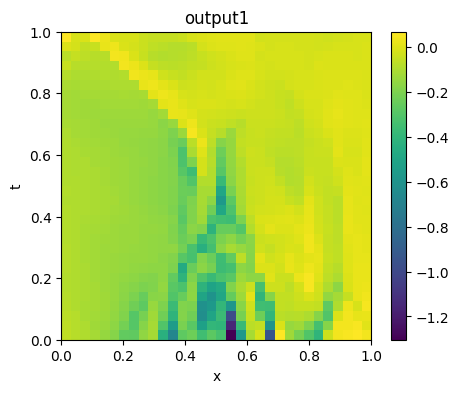

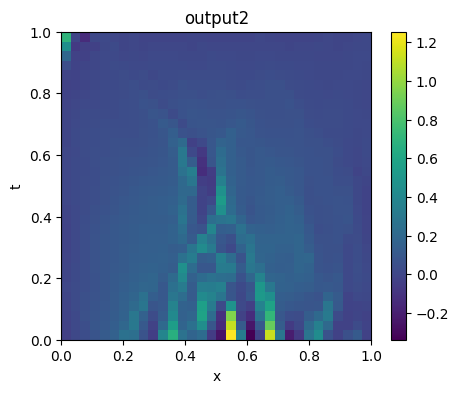

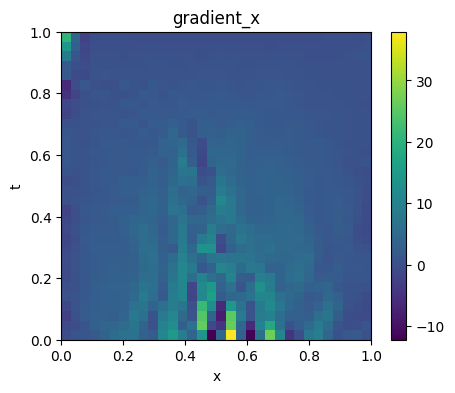

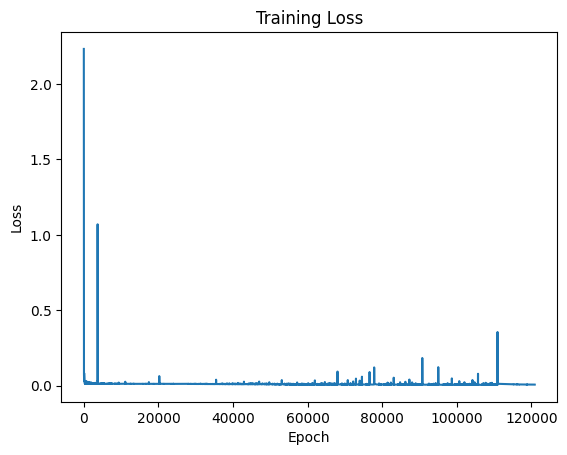

In [61]:
output1 = output1.detach().cpu().numpy() 
output2 = output2.detach().cpu().numpy() 
x =  x.detach().cpu().numpy() 
t =  t.detach().cpu().numpy() 
data = data.detach().cpu().numpy() 
gradient_x = gradient_x.detach().cpu().numpy() 
gradient_t = gradient_t.detach().cpu().numpy() 

print((np.square(output1 - gradient_x)).mean(axis=None))
print((np.square(output2 - gradient_t)).mean(axis=None))

plt.figure(figsize=(5, 4))
plt.imshow(output1, aspect='auto',extent=[np.min(x), np.max(x), np.min(t), np.max(t)], cmap='viridis')
plt.title('output1')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()
plt.show()


plt.figure(figsize=(5, 4))
plt.imshow(output2, aspect='auto',extent=[np.min(x), np.max(x), np.min(t), np.max(t)], cmap='viridis')
plt.title('output2')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(gradient_x, aspect='auto',extent=[np.min(x), np.max(x), np.min(t), np.max(t)], cmap='viridis')
plt.title('gradient_x')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()
plt.show()

#lt.figure(figsize=(5, 4))
#plt.imshow(gradient_t, aspect='auto',extent=[np.min(x), np.max(x), np.min(t), np.max(t)], cmap='viridis')
#plt.title('gradient_t')
#plt.xlabel('x')
#plt.ylabel('t')
#plt.colorbar()
#plt.show()


plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [62]:
np.save('wave_Inverse_xx_noise0.01.npy', output2)

32
32
3.229687127891784e-05
3.333133755136205e-05
1.9867616995955396e-05


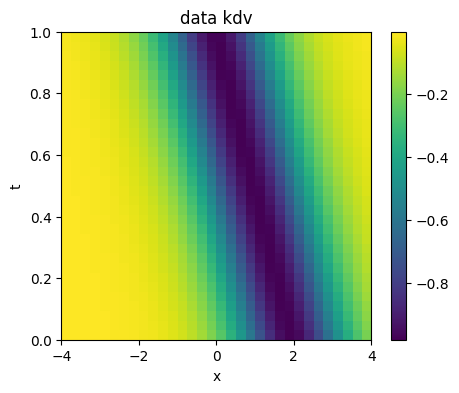

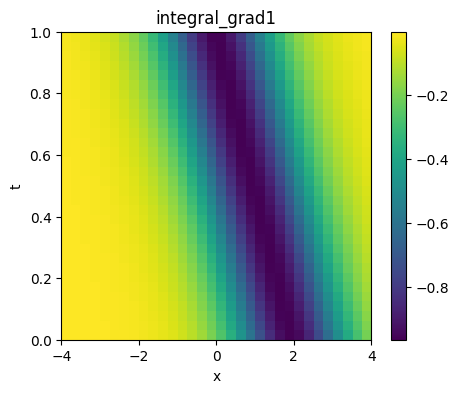

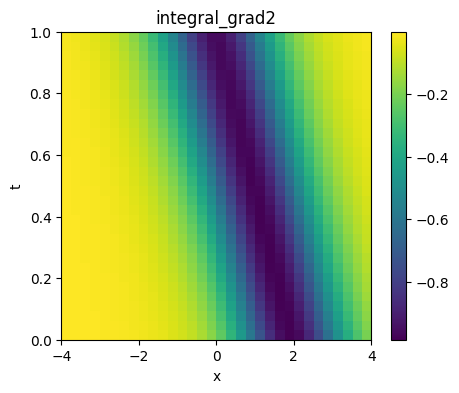

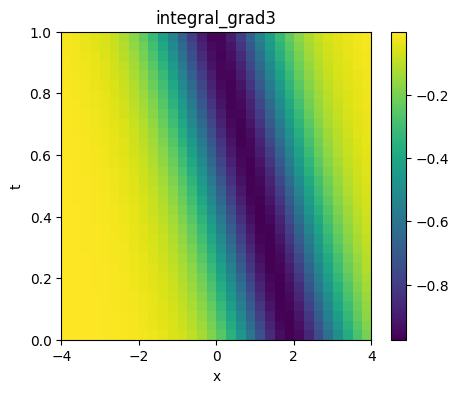

In [23]:
import numpy as np

x = np.linspace(-4, 4, 32)  
y = np.linspace(0, 1, 32)
data = np.load('data_kdv_noise0.npy')

# Функция для вычисления производных
def compute_gradients(data):
    dx = np.gradient(data, axis=0) 
    dy = np.gradient(data, axis=1)
    return dx, dy

def integrate_gradients1(dx, dy, initial_value):
    
    integral_x = np.zeros_like(dx)
    integral_x[0] = initial_value  
    for i in range(1, dx.shape[0]):
        integral_x[i] = integral_x[i - 1] + ((dx[i] + dx[i - 1])) / 2  
    
    integral_y = np.zeros_like(dy)
    integral_y[:, 0] = integral_x[:, 0] 
    
    for j in range(1, dy.shape[1]):
        integral_y[:, j] = integral_y[:, j - 1] + ((dy[:, j] + dy[:, j - 1])) / 2  

    return integral_y

def integrate_gradients2(dx, dy, initial_value):
    
    integral_y= np.zeros_like(dx)
    integral_y[0] = initial_value  
    for i in range(1, dy.shape[0]):
        integral_y[:, i] = integral_y[:, i - 1] + ((dy[:, i] + dy[:, i - 1])) / 2  
    
    integral_x = np.zeros_like(dy)
    integral_x[0] = integral_y[0] 
    
    for j in range(1, dx.shape[1]):
        integral_x[j] = integral_x[j - 1] + ((dx[j] + dx[j - 1])) / 2  

    return integral_x 


dx, dy = compute_gradients(data)

print(dy.shape[0])
print(dx.shape[1])

result1 = integrate_gradients1(dx, dy, initial_value)
result2 = integrate_gradients2(dx, dy, initial_value)

result3 = ((integrate_gradients1(dx, dy, initial_value) + integrate_gradients2(dx, dy, initial_value)) / 2)


print((np.square(data - result1)).mean(axis=None))
print((np.square(data - result2)).mean(axis=None))
print((np.square(data - result3)).mean(axis=None))


plt.figure(figsize=(5, 4))
plt.imshow(data, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data kdv')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(result1, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('integral_grad1')
plt.xlabel('x')
plt.ylabel('t')
plt.show()


plt.figure(figsize=(5, 4))
plt.imshow(result2, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('integral_grad2')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(result3, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('integral_grad3')
plt.xlabel('x')
plt.ylabel('t')
plt.show()
